# Лабораторная 2. Многослойный персептрон

Для примера построим персептрон для аппроксимации синусоиды

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math
plt.rcParams["figure.figsize"] = (20,6)
rng = np.random.default_rng(51)

Метрика оценки качества - коэффициент детерминации (R^2)

In [4]:
def R_square(y_pred, y):
  y_mean = np.mean(y)
  return 1 - np.sum(np.square(y - y_pred))/np.sum(np.square(y - y_mean))

Создадим набор данных, используя косинус. Соотношение обучающей и тестовой выборок - 70 к 30

In [5]:
X = np.linspace(0, 4*math.pi, 3000)
y = np.cos(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
def get_batches(data, batch_size):
  n = len(data)
  get_X = lambda z: z[0]
  get_y = lambda z: z[1]
  for i in range(0, n, batch_size):
    batch = data[i:i+batch_size]
    yield np.array([get_X(b) for b in batch]), np.array([get_y(b) for b in batch])

Создадим класс нейронной сети с весами, смещением и оптимизатором Adam

In [7]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000)

Совпадений до обучения: 916


100%|██████████| 100/100 [00:17<00:00,  5.64it/s]


Final loss: loss=0.036692292166555354
Совпадений после обучения: 1883


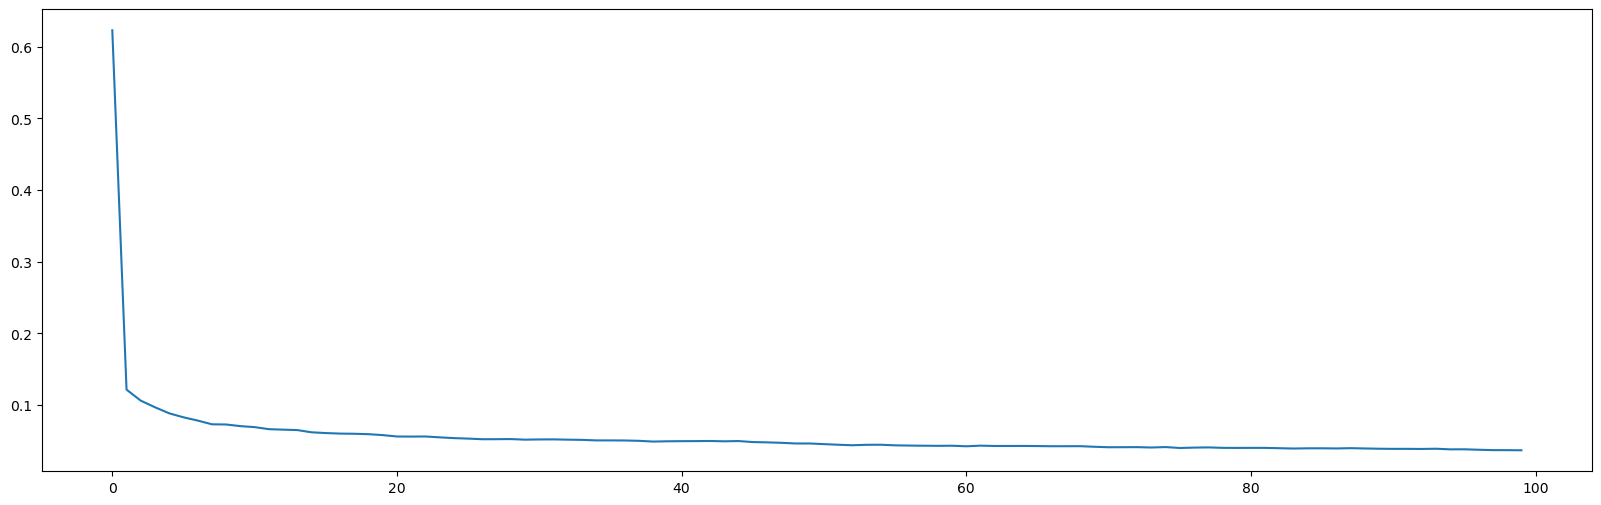

In [8]:
from mlp import *
import matplotlib.pyplot as plt


activation_info = {"activation": sigmoid, "activation_diff": sigmoid_diff}
loss_info = {"loss": mse, "loss_diff": mse_diff}

model = MLP((20, 10, 18, 2), activation_info, loss_info)

print("Совпадений до обучения:", sum(np.argmax(model.predict(X), axis=1) == y))
losses = model.fit(X, y, n_iters=100, batch_size=100, stop_threshold=0.00001, learning_rate=0.001)
print("Совпадений после обучения:", sum(np.argmax(model.predict(X), axis=1) == y))

plt.plot(losses)
# plt.grid()
plt.show()


# Задача для лабораторной 2

По условиям лабораторной 2 надо классифицировать датасет с грибами, который состоит из картегориальных признаков. Поэтому, для начала, посмотрим на сам датасет. Вполне может статься, что нам нужны не все признаки.

Теперь посмотрим на работу с категориальными признаками. Для этого загрузим датасет UCI Machine Learning Repository: Mushroom Data Set(https://archive.ics.uci.edu/ml/datasets/Mushroom). Здесь стоит задача бинарной классификации грибов Агариковые (к ним принадлежит Шампиньон) и Лепиота на два класса: съедобные (edible) и ядовитые (poisonous). Датасет состоит из 8416 строк для двух классов (съедобные - 53,3% и ядовитые - 46,7%). В наличии 22 категориальных признака:
1. форма шляпки (cap-shape): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. поверхность шляпки (cap-surface): fibrous=f,grooves=g,scaly=y,smooth=s
3. цвет шляпки (cap-color): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. повреждения (bruises?): bruises=t,no=f
5. запах (odor): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. соединение пластинки (gill-attachment): attached=a,descending=d,free=f,notched=n
7. пространство между пластинками (gill-spacing): close=c,crowded=w,distant=d
8. размер пластинки (gill-size): broad=b,narrow=n
9. цвет пластинок (gill-color): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. форма ножки (stalk-shape): enlarging=e,tapering=t
11. корень ножки (stalk-root): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. поверхность ножки над кольцом (stalk-surface-above-ring): fibrous=f,scaly=y,silky=k,smooth=s
13. поверхность ножки под кольцом (stalk-surface-below-ring): fibrous=f,scaly=y,silky=k,smooth=s
14. цвет ножки над кольцом (stalk-color-above-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. цвет ножки под кольцом (stalk-color-below-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. тип покрывала (veil-type): partial=p,universal=u
17. цвет покрывала (veil-color): brown=n,orange=o,white=w,yellow=y
18. количество колец (ring-number): none=n,one=o,two=t
19. тип кольца (ring-type): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. цвет спорового порошка (spore-print-color): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. популяция (population): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. среда обитания (habitat): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [11]:
import pandas as pd

dfm=pd.read_csv('2. Mushroom_dataset', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
dfm

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


# Описательная статистика

Посмотрим на соотношение классов в наборе данных, чтобы оценить сбалансированность выборки

In [12]:
dfm['class-label'].value_counts()

class-label
EDIBLE       4488
POISONOUS    3928
Name: count, dtype: int64

На сей раз в описательной статистике есть почти все что надо: количество (count), мощность (unique), мода (top) и частота моды (freq). Не хватает только процента пропущенных значений.

In [13]:
dfm.describe()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


# Распределения

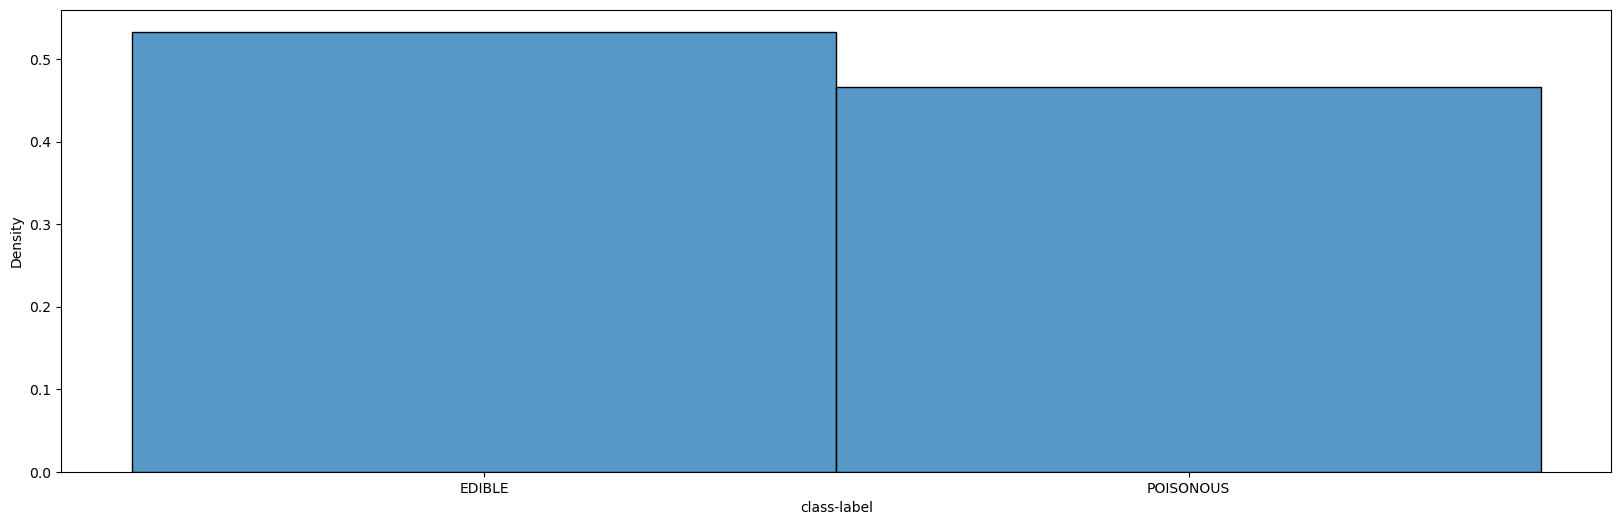

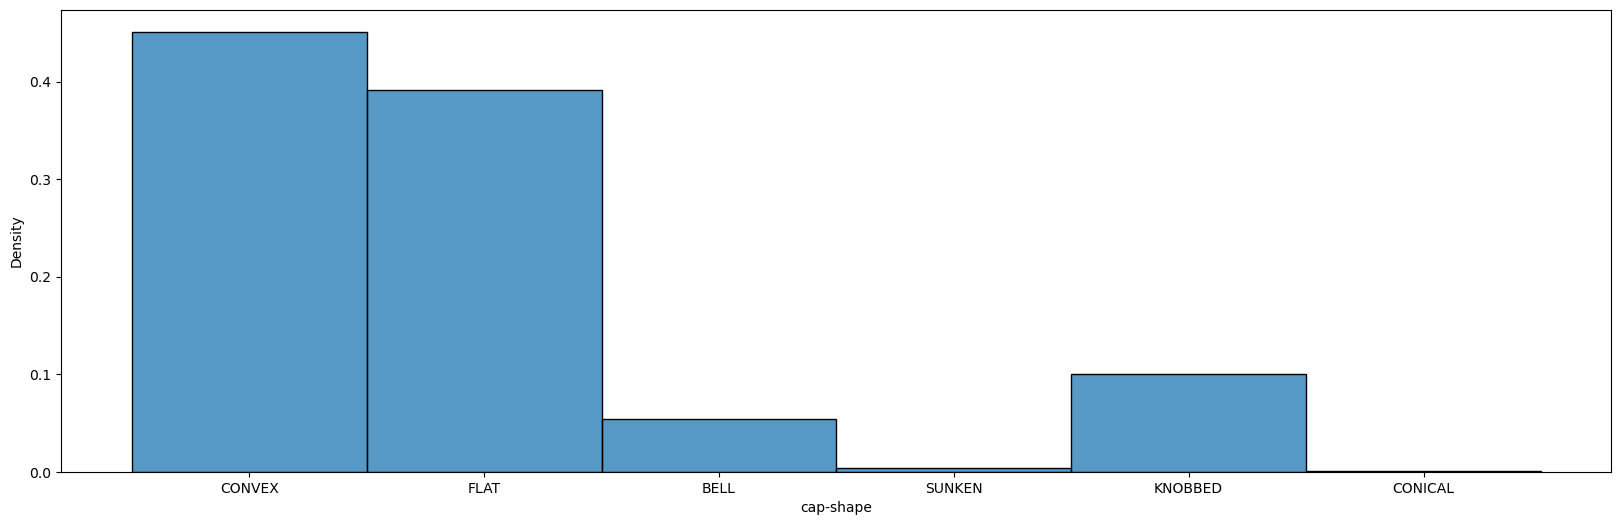

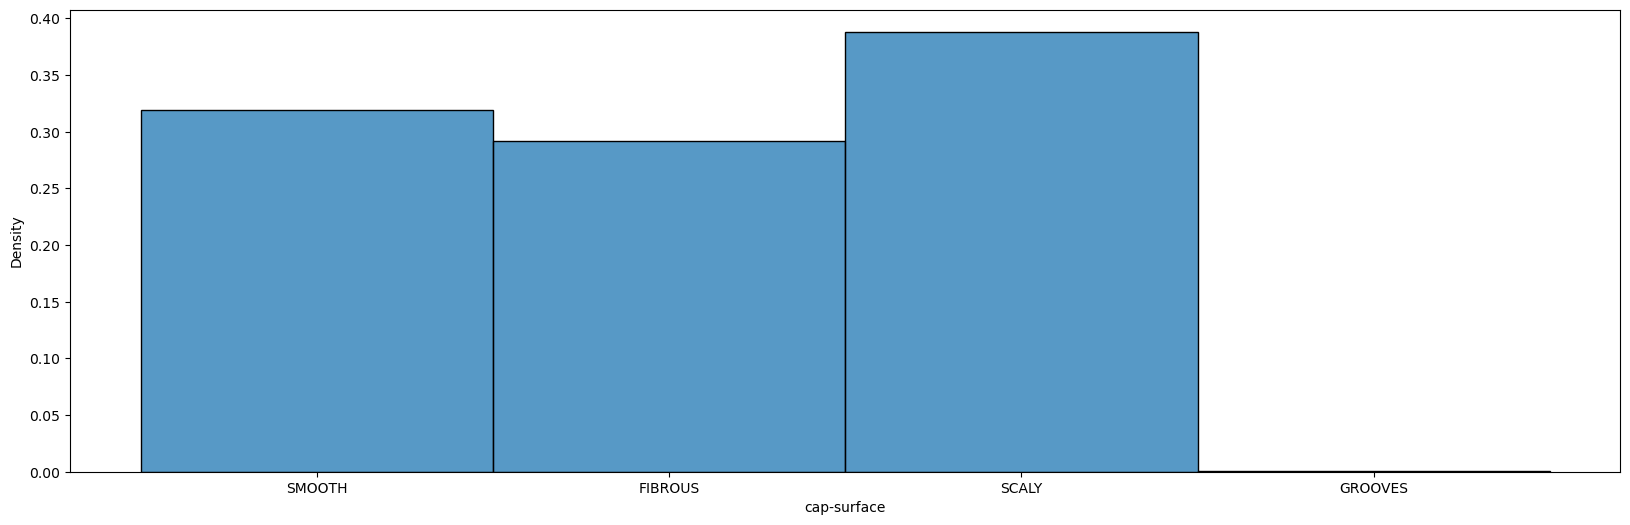

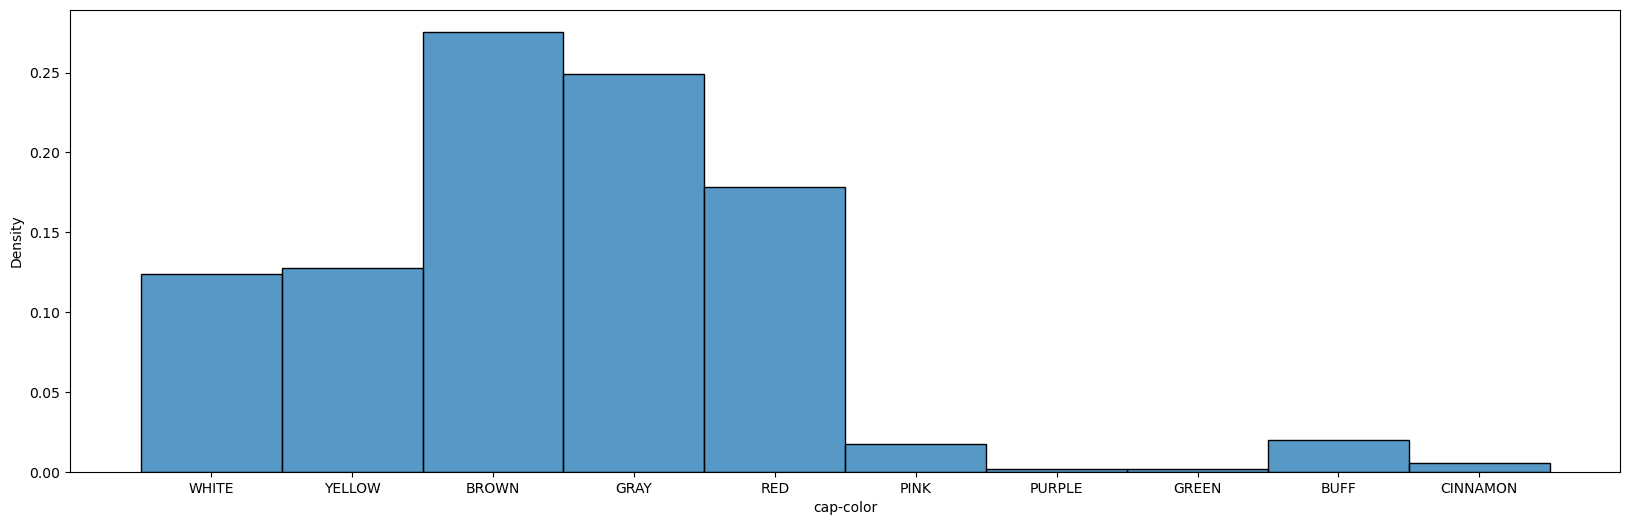

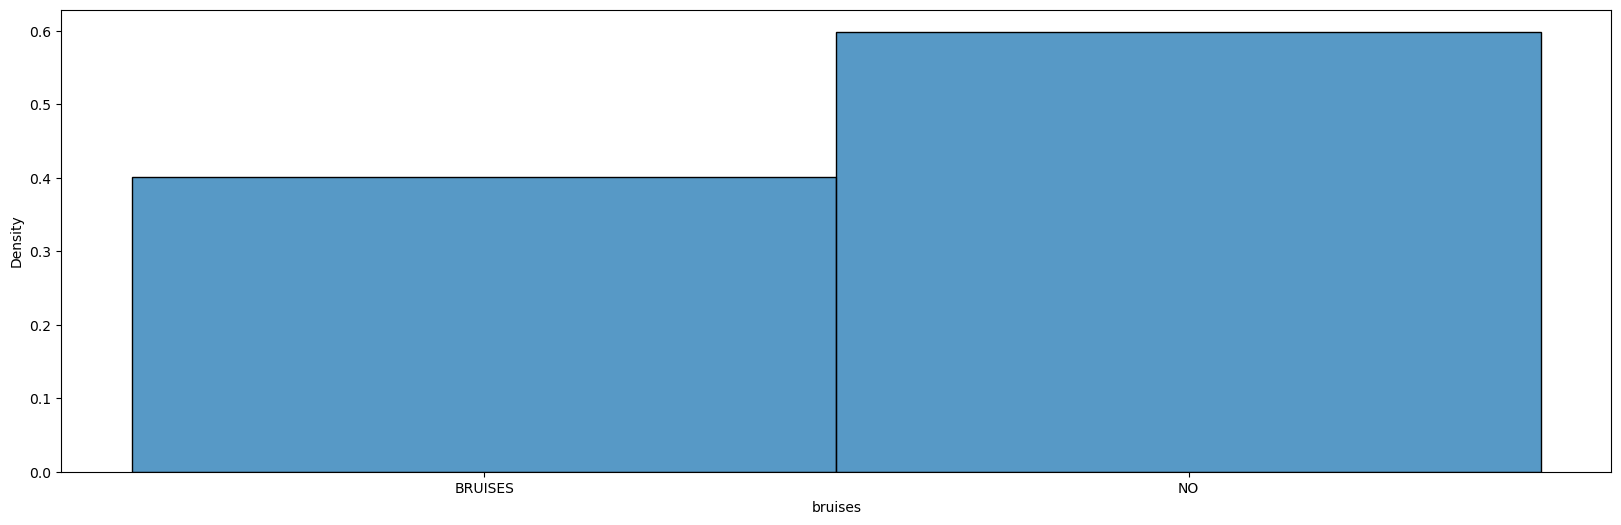

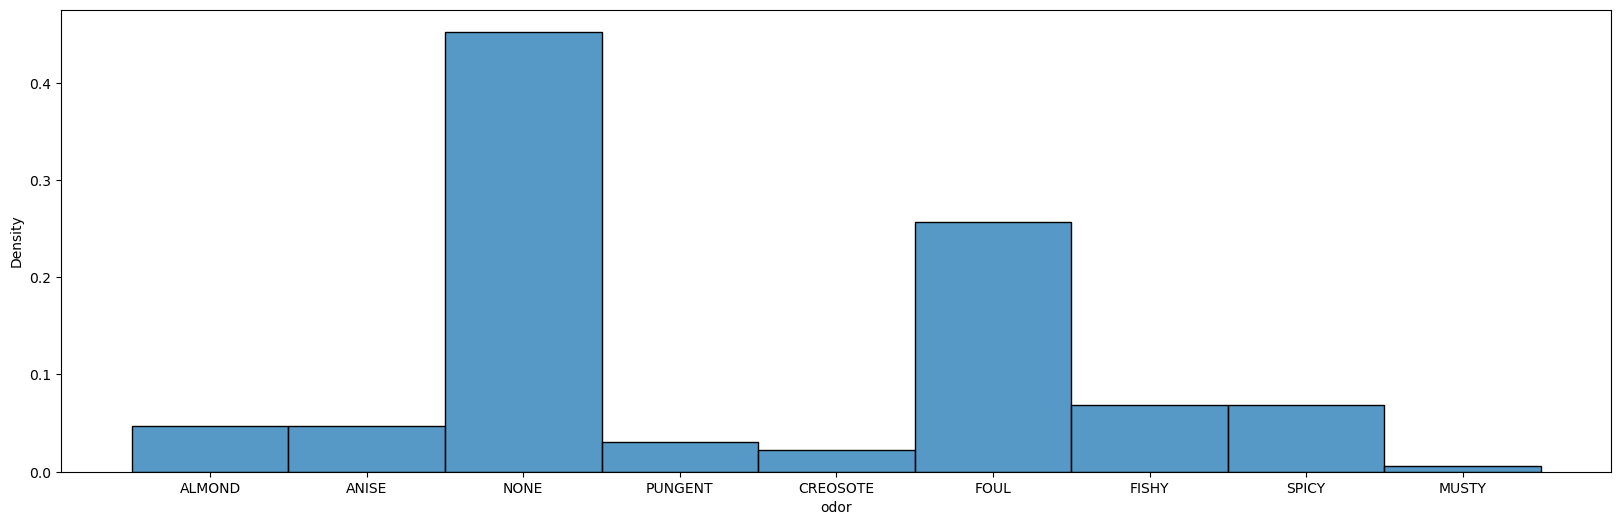

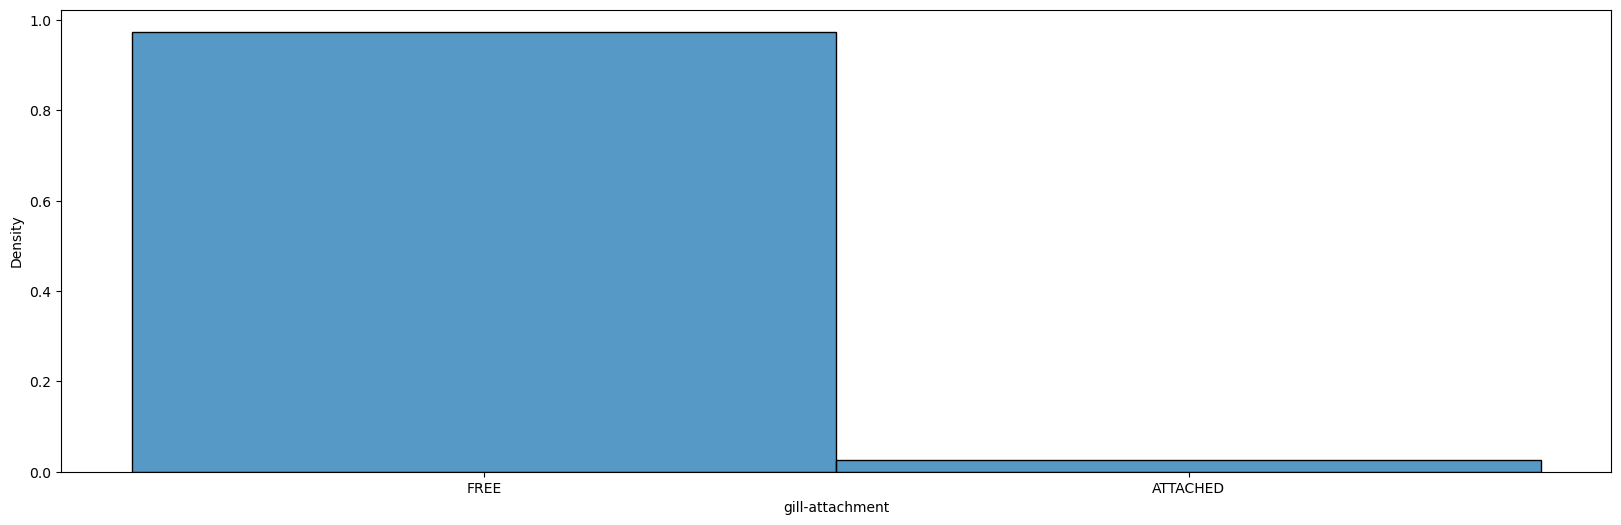

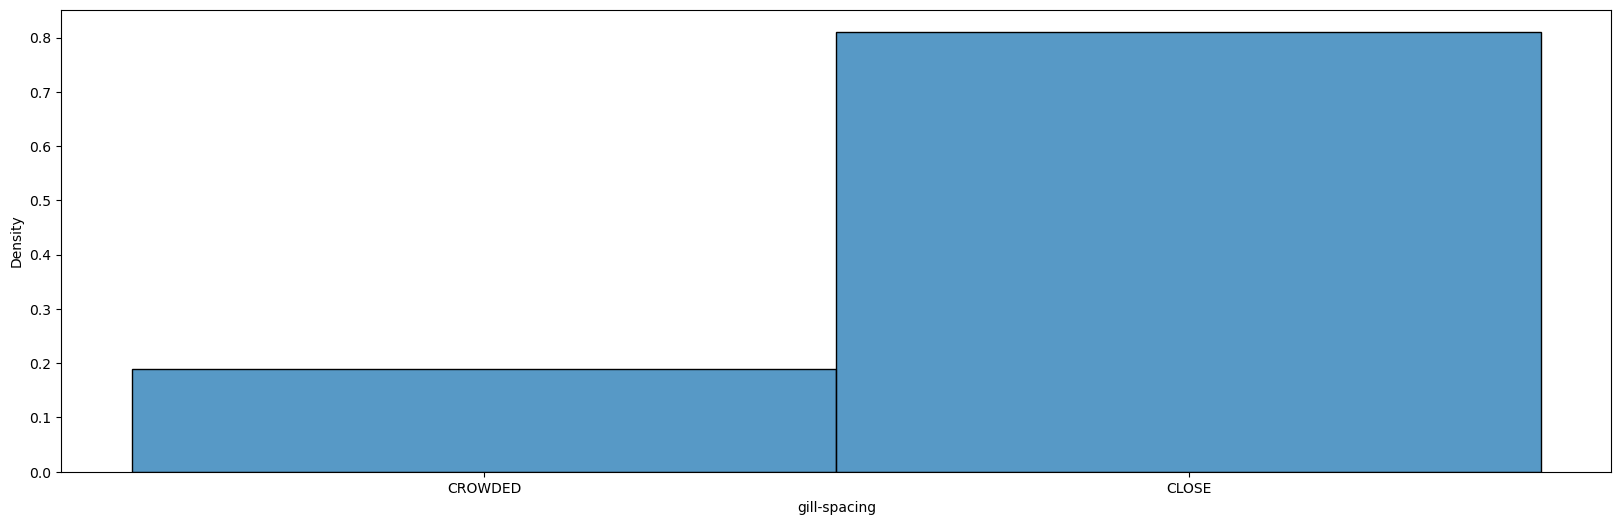

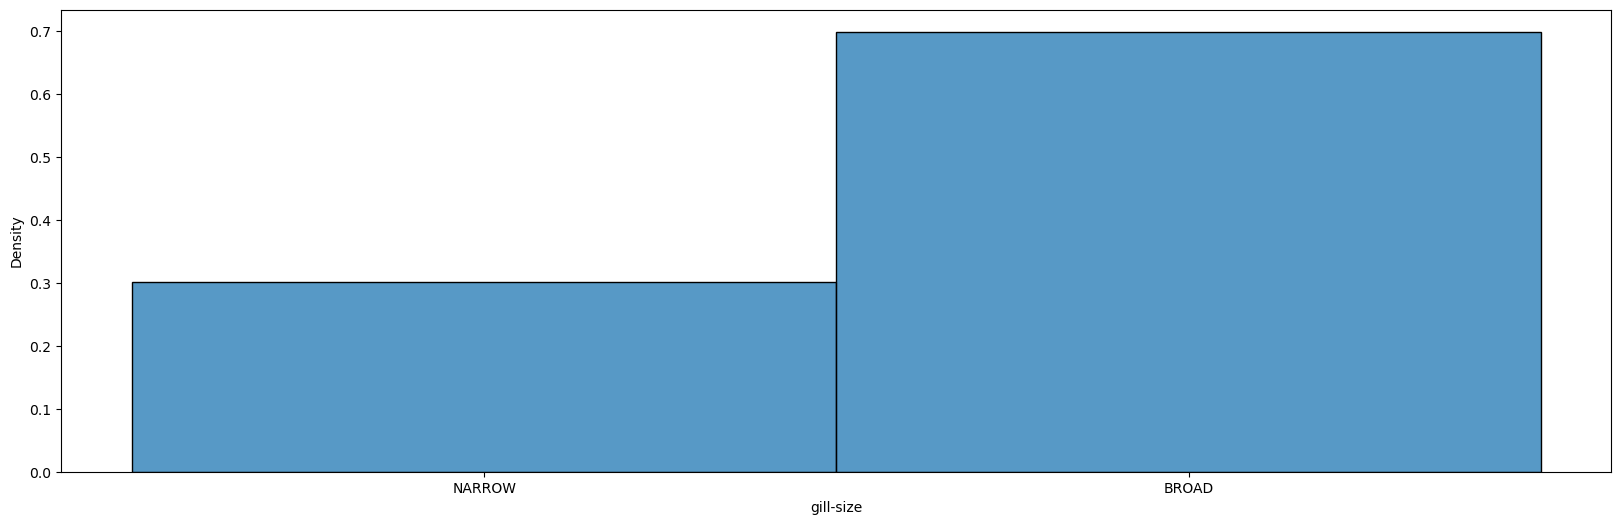

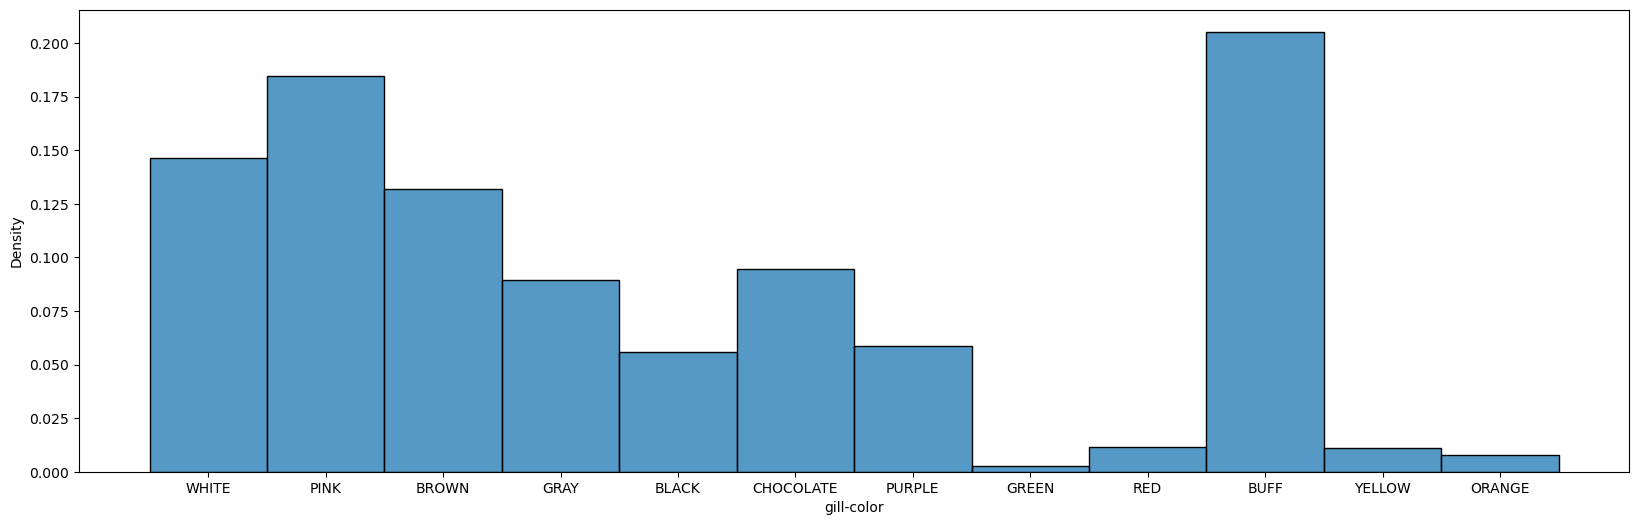

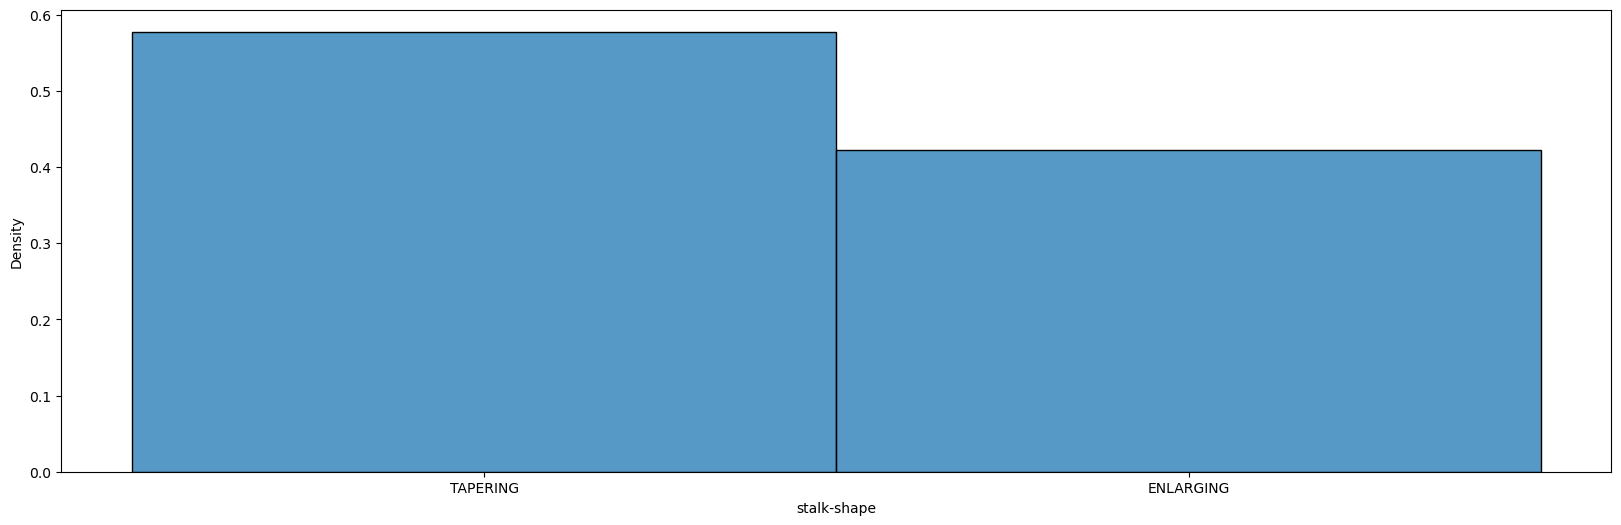

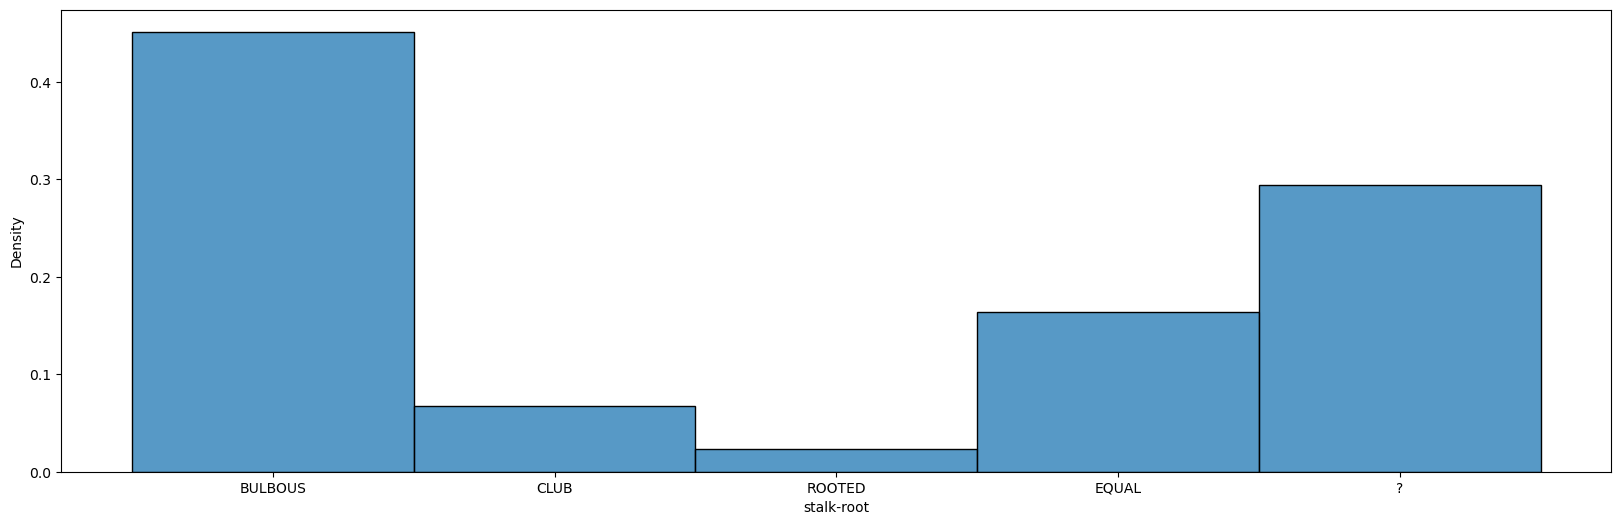

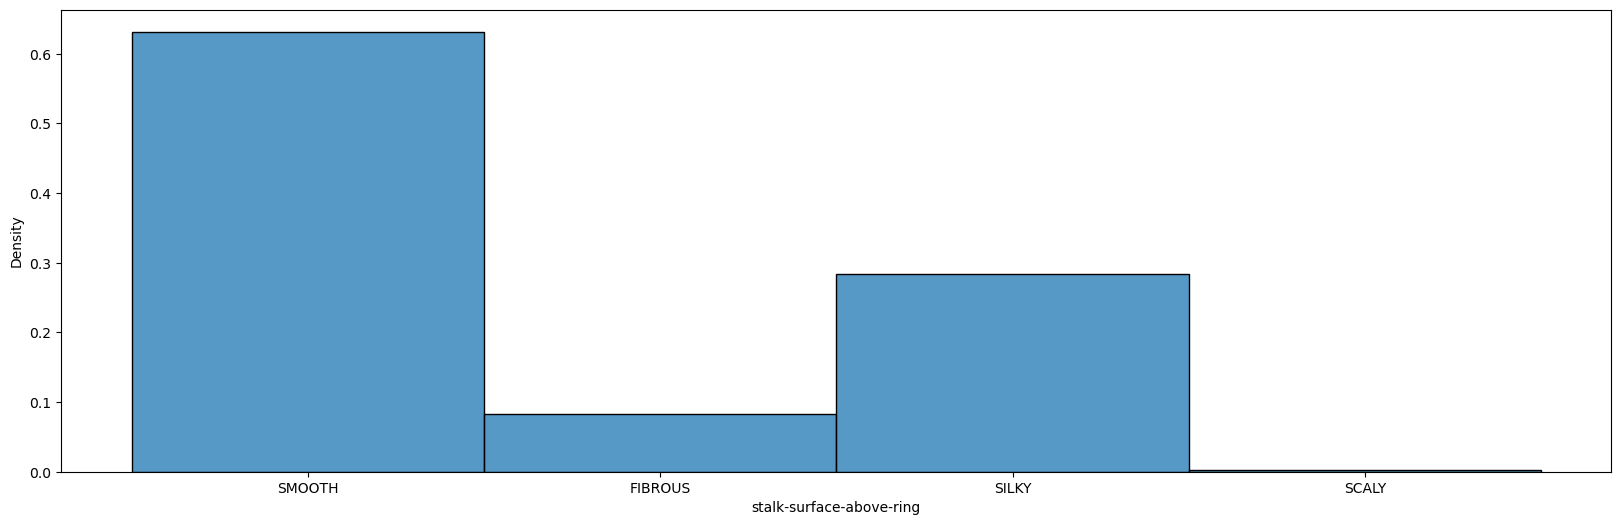

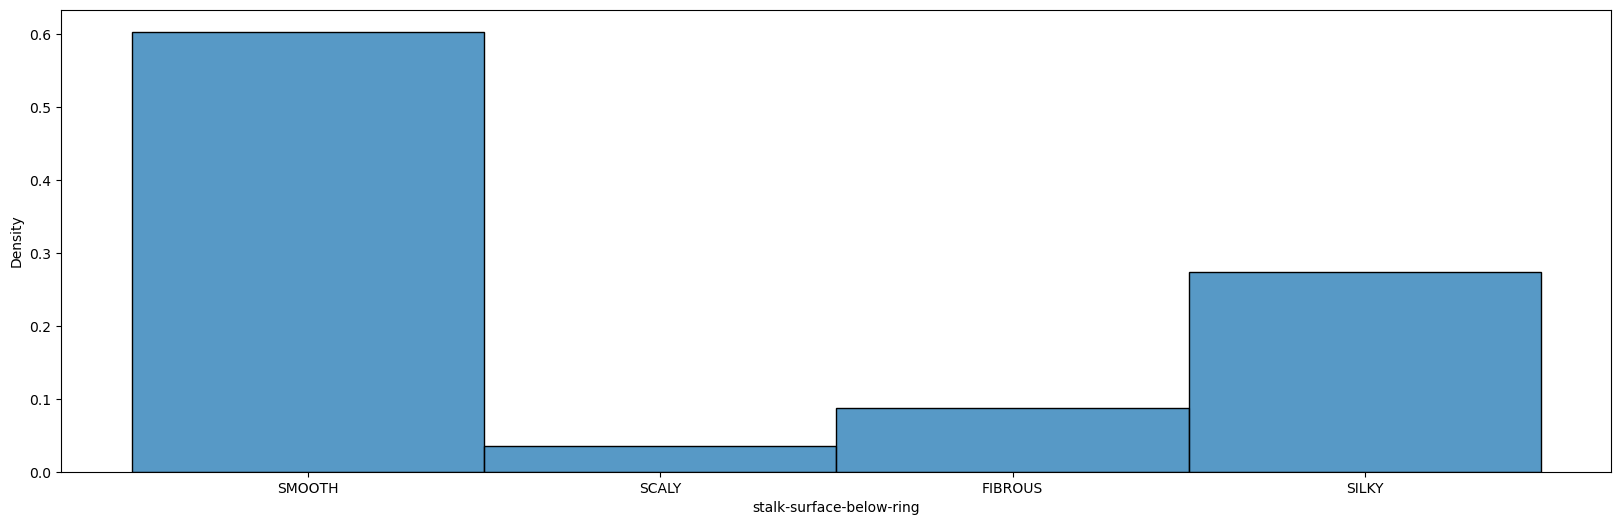

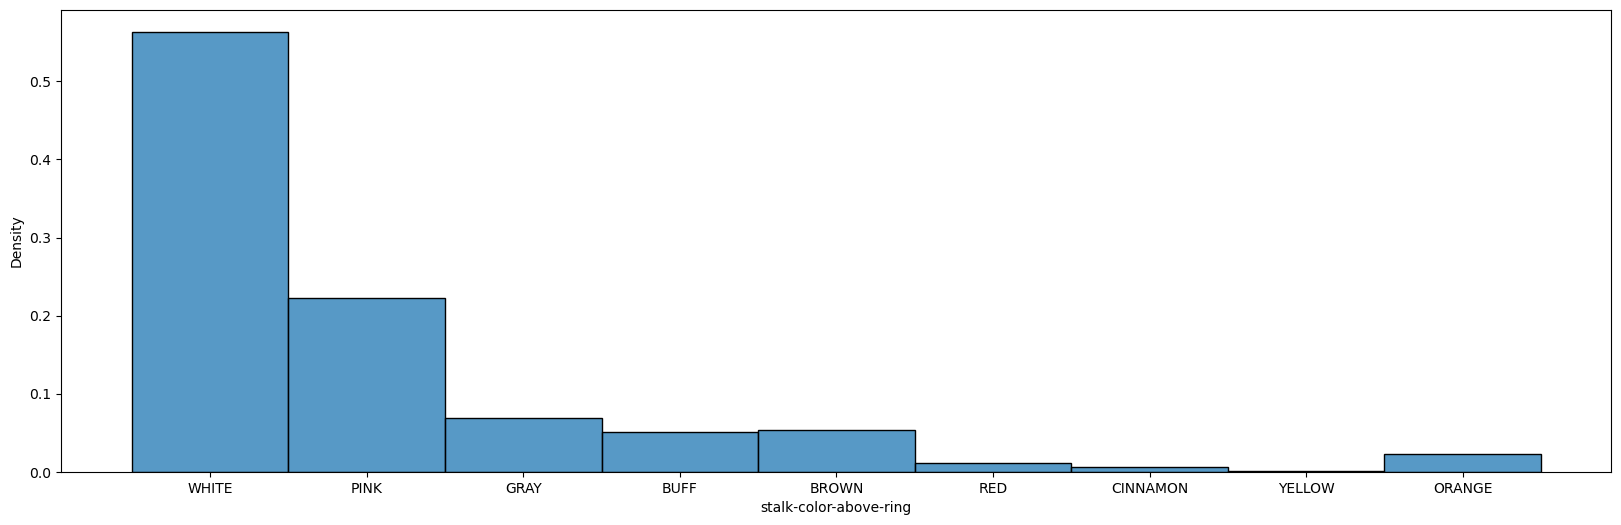

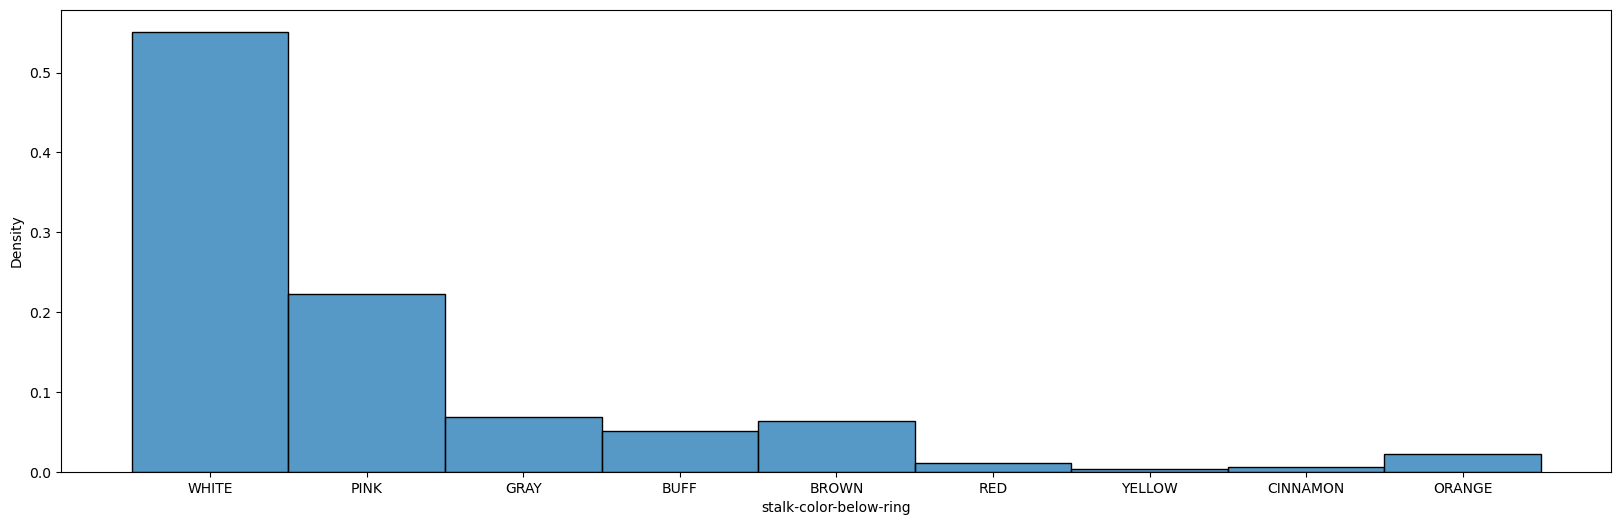

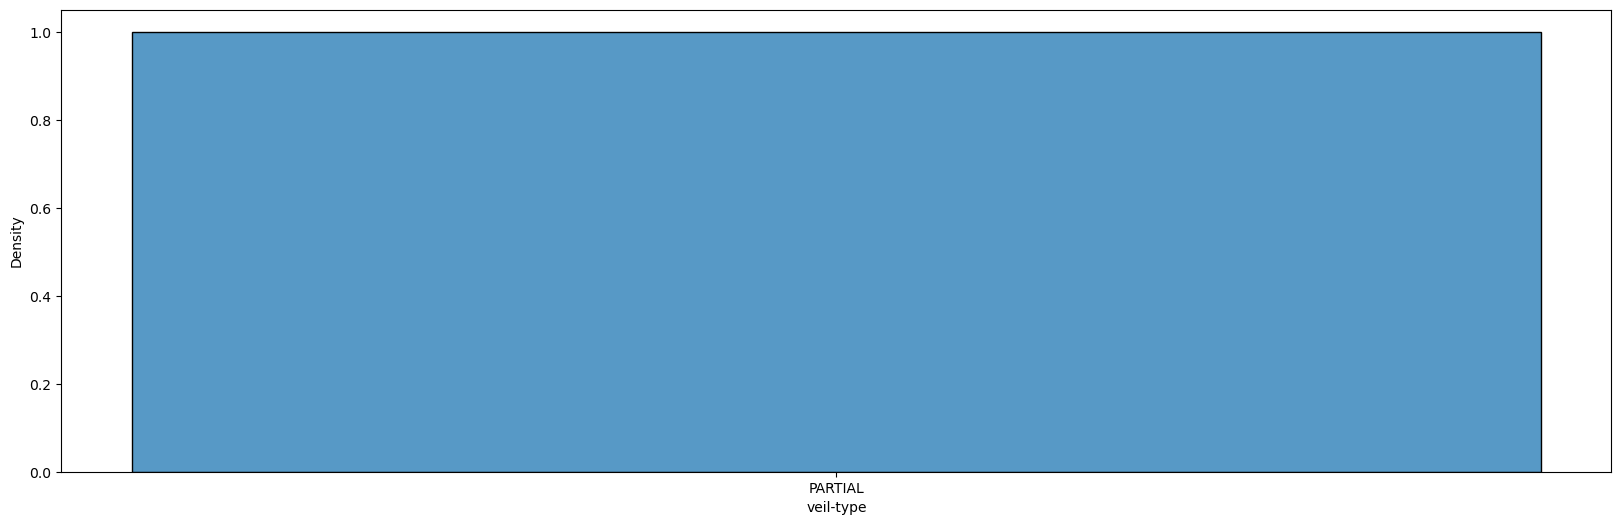

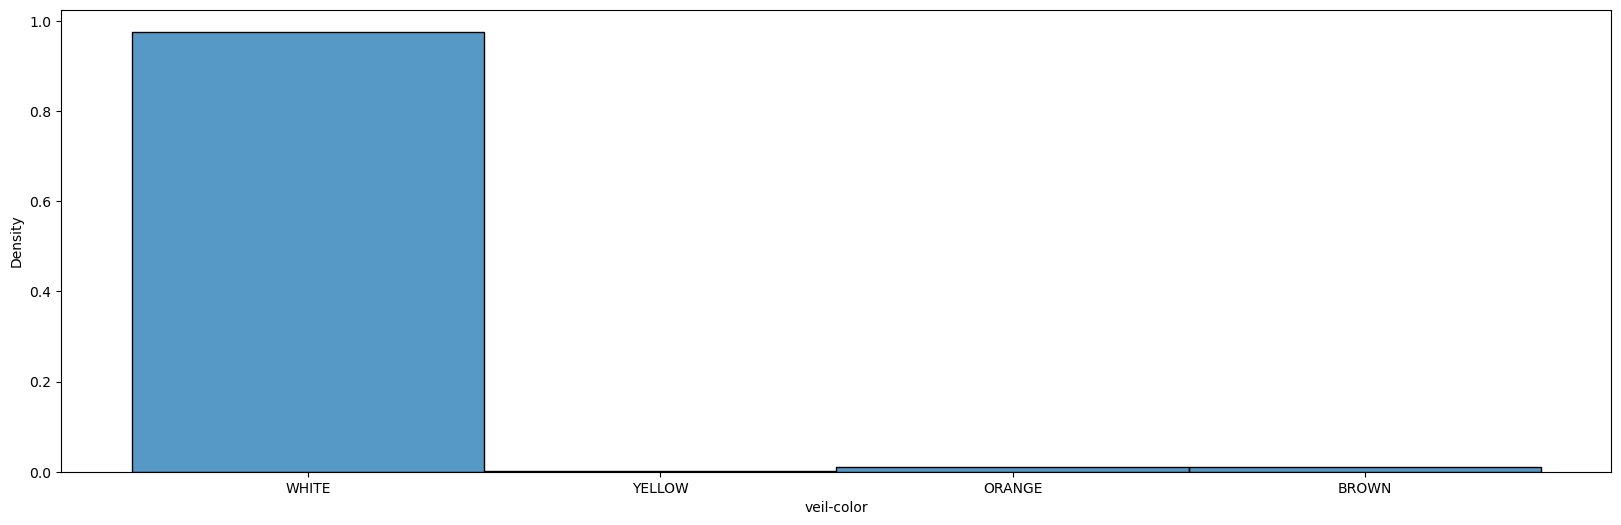

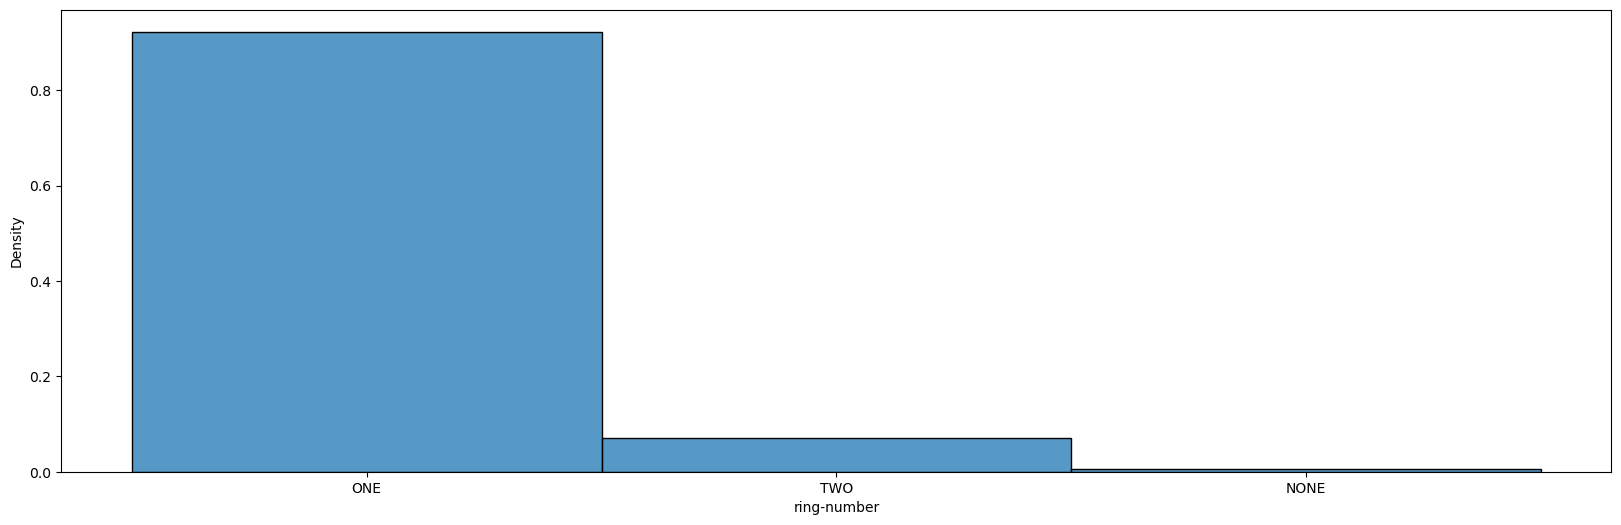

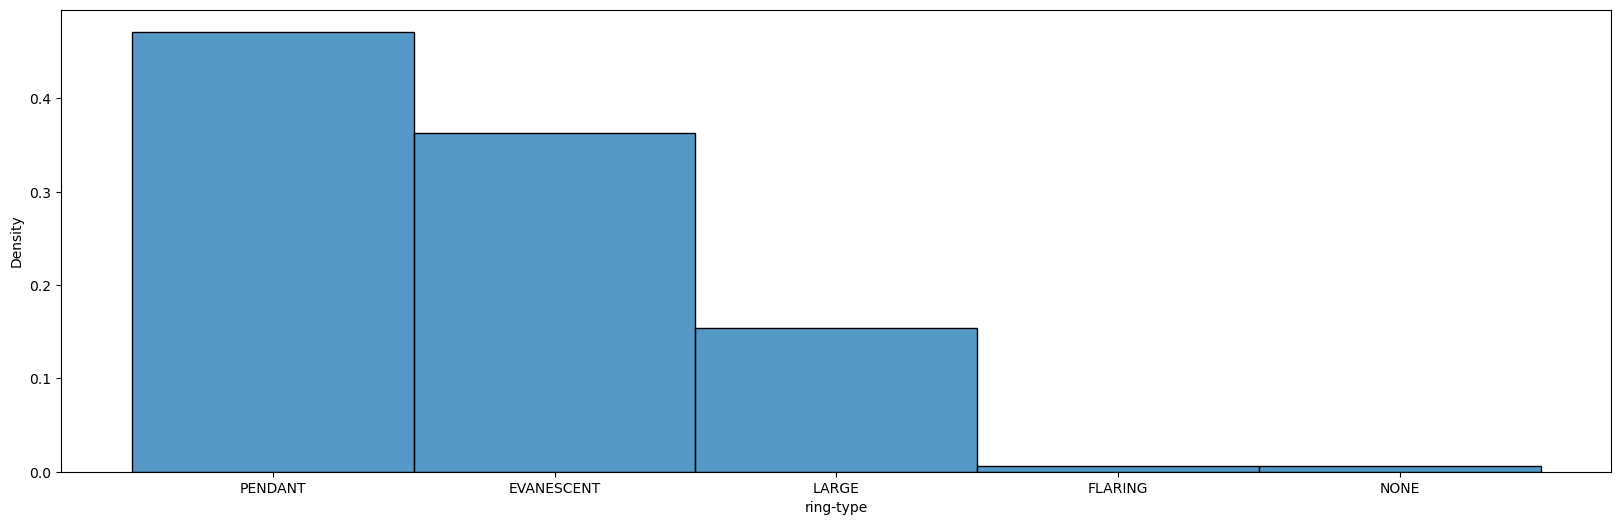

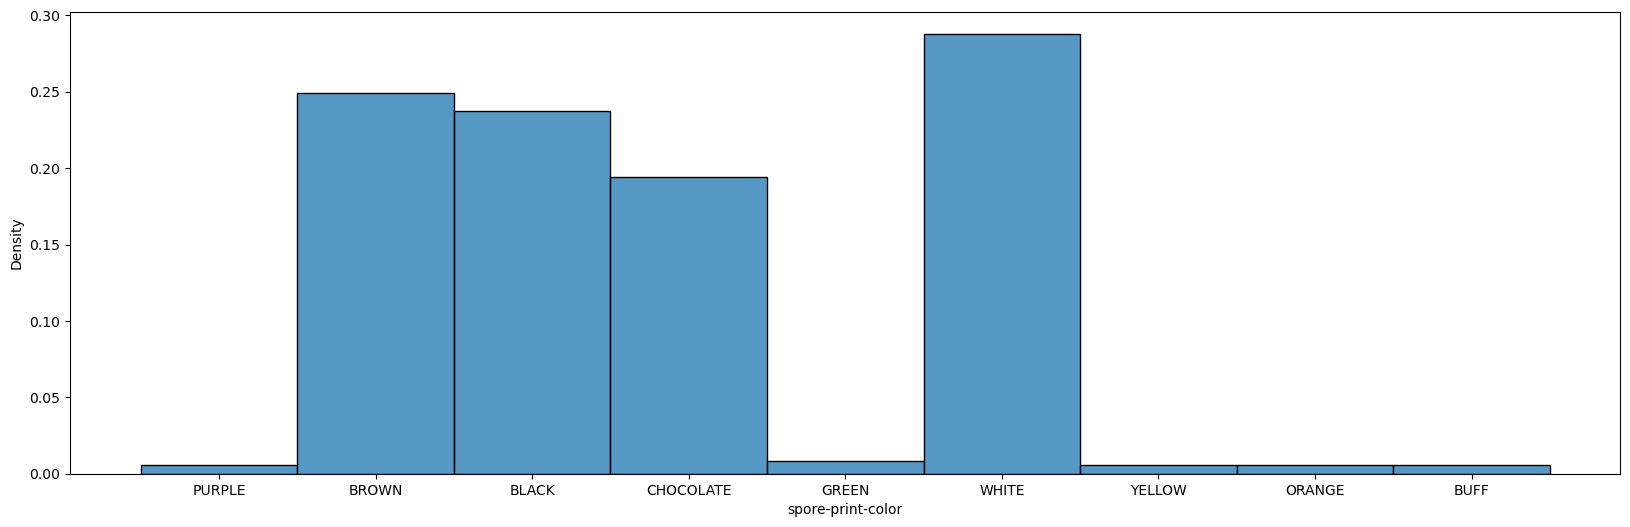

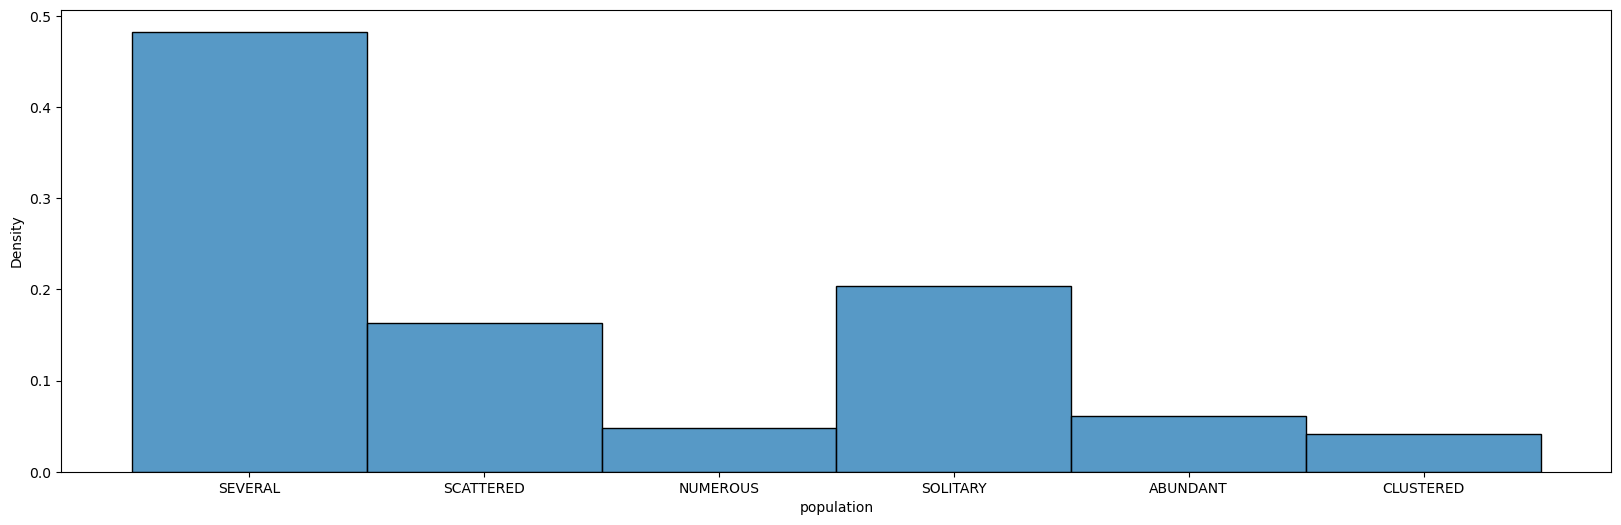

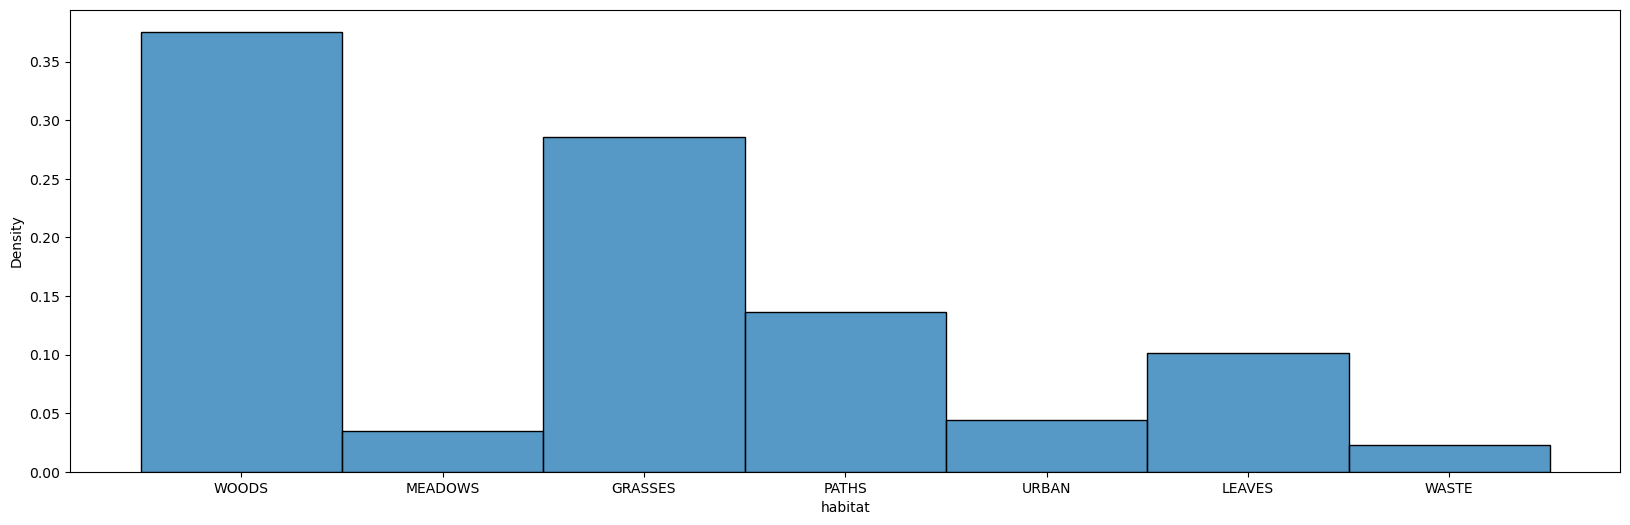

In [14]:
for i in dfm.columns:
    plt.figure(i)
    sns.histplot(dfm[i],stat="density")
    plt.show()

# Важность признаков

In [15]:
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])

In [19]:
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: >

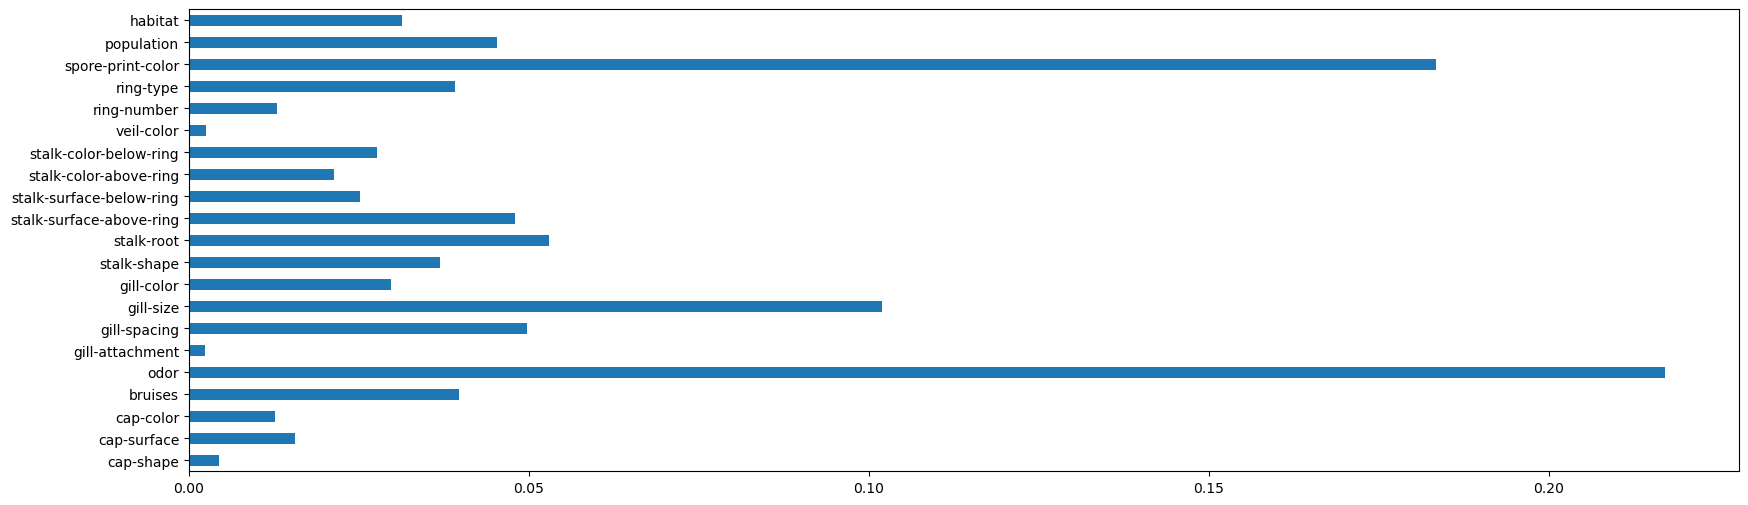

In [20]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [18]:
dfm = dfm.drop(columns=["veil-type"])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:23]

# Подготовка датасета

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Инициализация модели и обучение

Совпадений до обучения: 2758


100%|██████████| 100/100 [00:59<00:00,  1.69it/s]

Final loss: loss=0.04532795408899133
Совпадений после обучения: 5150


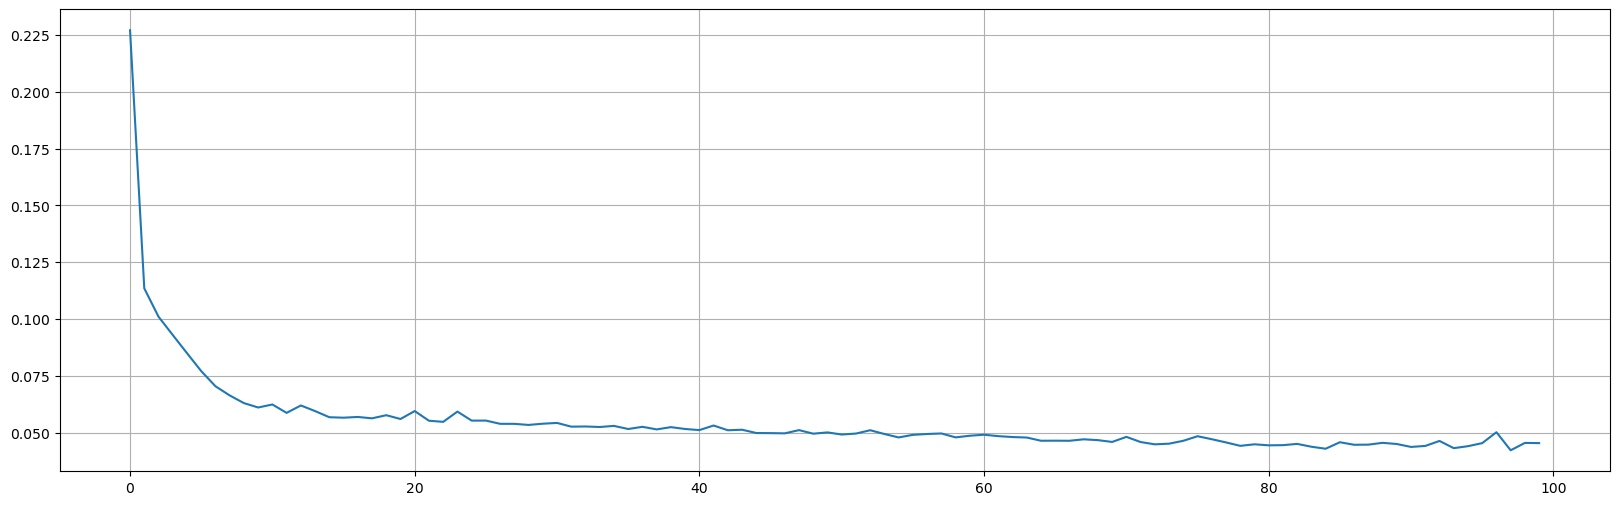

In [22]:
from mlp import *
import matplotlib.pyplot as plt


activation_info = {"activation": sigmoid, "activation_diff": sigmoid_diff}
loss_info = {"loss": mse, "loss_diff": mse_diff}

model = MLP((21, 10, 18, 2), activation_info, loss_info)

print("Совпадений до обучения:", sum(np.argmax(model.predict(X_train), axis=1) == y_train))
losses = model.fit(X_train.to_numpy(), y_train, n_iters=100, batch_size=16, stop_threshold=0.00001, learning_rate=0.001)
print("Совпадений после обучения:", sum(np.argmax(model.predict(X_train), axis=1) == y_train))

plt.plot(losses)
plt.grid()
plt.show()

# Оценка метрик

In [36]:
from mlp import MetricsEstimator

In [37]:
estimator = MetricsEstimator()

In [38]:
y_pred = np.argmax(model.predict(X_test), axis=1)
estimator.get_metrics(y_true=y_test, y_pred=y_pred)
print(estimator)

accuracy = 0.8728712871287129
precision = 0.9435736677115988
recall = 0.7717948717948718
f1_score = 0.8490832157968972


In [26]:
from sklearn.metrics import roc_curve

In [27]:
y_pred = model.predict(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

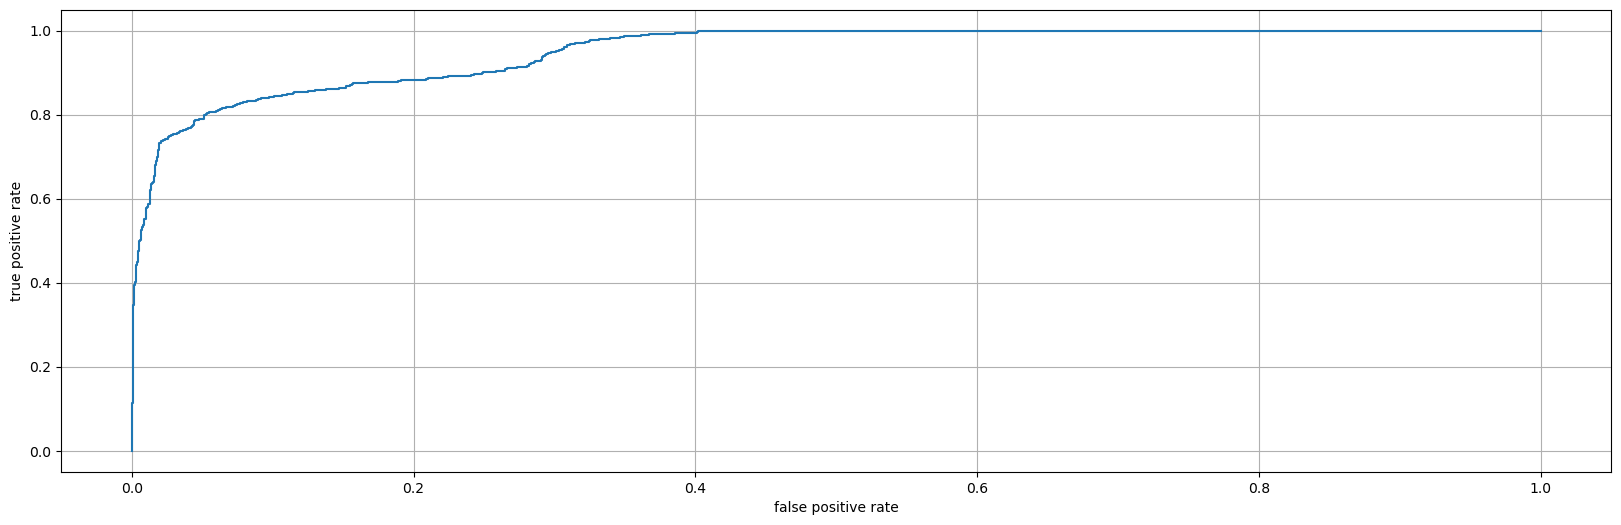

In [28]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [34]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [30]:
y_pred = np.argmax(model.predict(X_test), axis=1)

In [33]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.82971939, 0.94357367]),
 array([0.9601476 , 0.77179487]),
 array([0.89018132, 0.84908322]),
 array([1355, 1170]))

In [35]:
accuracy_score(y_test, y_pred)

0.8728712871287129